# Praktična programska pitanja vezana uz skupove podataka

## 1. Zadatak
Skup podataka „Estonia“ sadrži zemlju podrijetla, ime, spol (M - muški, F - ženski),
godine, kategoriju (P - putnik, C - posada) i sudbinu (0 - poginuo, 1 - preživio) za 742
putnika na brodu MS Estonia u noći potonuća. Za ovaj skup podataka (`estonia-passenger-list-modified.csv`) odredite:

a) (1 bod) Kako biste klasificirali zadani izvor podataka prema strukturi?

In [1]:
import pandas as pd

from pathlib import Path

In [2]:
dataset_dir = Path("./datasets/")

df = pd.read_csv(dataset_dir / "estonia-passenger-list-modified.csv")
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,694,Estonia,MARGUS,PUKSPUU,M,35.0,P,0
1,596,Sweden,BRITT MARGARETA,NILSSON,F,39.0,P,0
2,550,Estonia,IVI,MATSALU,F,58.0,P,0
3,291,Sweden,BIRGIT MARIA,JAKOBSSON,F,67.0,P,0
4,388,Estonia,SAIDYA,KIVILA,F,48.0,C,0


**Odgovor:** 3 su podjele podataka obzirom na izvor podataka, **struktuirani, polustrukturirani i nestrukturirani** podatci. Nas slucaj pripada klasi strukturiranih podataka, jer se koriste neke oznake kojima se opisuju strukture i značenja podataka.

b) (1 bod) Objasnite o kojoj se vrsti istraživanja prema vrsti korištenih podataka
ovdje radi.

**Odgovor:** Dvije su podjele, **kvalitativno i kvantitativno** istrazivanje. Ovdje se radi o kvalitativnoj vrsti istrazivanja.

c) (1 bod) Objasnite radi li se ovdje o **studiji presjeka** ili o **longitudinalnom
istraživanju**.

**Odgovor:** Nacin podjele istraživanja prema vremenu provedbe. U nasem se slucaju govori o studiji presjeka (govori se o tocno odredenome trenutku, potonucu broda, a ne o duzem vremenskom periodu).

d) (2 boda) Kako je u ovo istraživanje uključen slučajan podskup od 742 putnika (od
ukupnog broja od 989 putnika), radi li se o slučajnom, pristranom ili neslučajnom
uzorku? Objasnite svoj odgovor. Definirajte svaki od navedenih vrsta uzoraka.

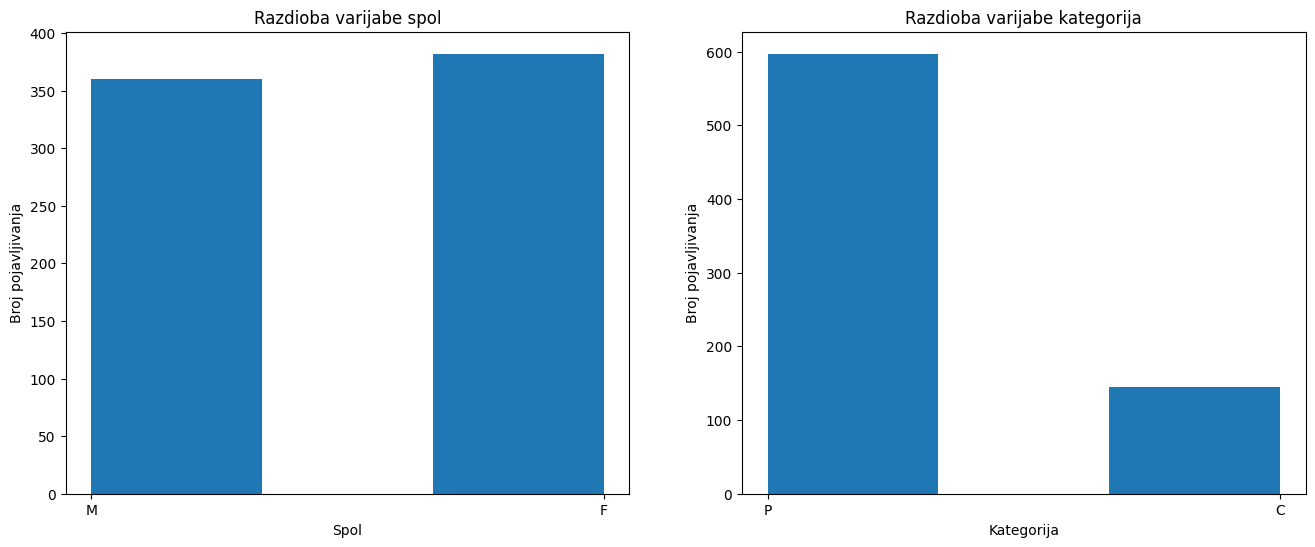

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].hist(df['Sex'], bins=3)
axs[0].set_title('Razdioba varijabe spol')
axs[0].set_xlabel('Spol')
axs[0].set_ylabel('Broj pojavljivanja')

axs[1].hist(df['Category'], bins=3)
axs[1].set_title('Razdioba varijabe kategorija')
axs[1].set_xlabel('Kategorija')
axs[1].set_ylabel('Broj pojavljivanja')

plt.show()

**Odgovor:** Slucajni uzorak ima (teoretski) normalnu razdiobu, pristrani govori da postoji veca sansa da odredeni uzorak bude izabran, te neslucajni uzorak označava situaciju gdje nije postojala jednaka vjerojatnost da svi članovi populacije budu odabrani. Iako se sa slike vidi znacajna pristranost putnika u odnosu na osoblje, ocekivano je da odnos bude takav (ne mozemo ocekivati podjednaku razdiobu putnika i posade broda). Zakljucak, radi se o slucajnome uzorku.

e) (2 boda) Izbacite značajke `PassengerId`, `Firstname` i `Lastname`. Za svaku od značajki `Country`, `Sex` i `Category` iskoristite odgovarajuću metodu pretvorbe (engl. *encoder*) kako biste kategoričke podatke transformirali u numeričke vrijednosti.

In [4]:
cleaned_df = df.drop(['PassengerId', 'Firstname', 'Lastname'], axis=1)
cleaned_df.head()

,Country,Sex,Age,Category,Survived
0,Estonia,M,35.0,P,0
1,Sweden,F,39.0,P,0
2,Estonia,F,58.0,P,0
3,Sweden,F,67.0,P,0
4,Estonia,F,48.0,C,0


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  # We use label encoding especially on Country variable due to many different options
le.fit(cleaned_df.loc[:, 'Sex'])
cleaned_df.loc[:, 'Sex'] = le.transform(cleaned_df.loc[:, 'Sex'])

le.fit(cleaned_df.loc[:, 'Category'])
cleaned_df.loc[:, 'Category'] = le.transform(cleaned_df.loc[:, 'Category'])

le.fit(cleaned_df.loc[:, 'Country'])
cleaned_df.loc[:, 'Country'] = le.transform(cleaned_df.loc[:, 'Country'])

cleaned_df.head()

,Country,Sex,Age,Category,Survived
0,3,1,35.0,1,0
1,13,0,39.0,1,0
2,3,0,58.0,1,0
3,13,0,67.0,1,0
4,3,0,48.0,0,0


f) (2 boda) Provedite zamjenu nedostajućih vrijednosti značajke “Age” mjerom
očuvanja sredine. Pojasnite koju mjeru sredine koristite i zašto.

Broj nedostajucih vrijednosti znacajke Age: 37


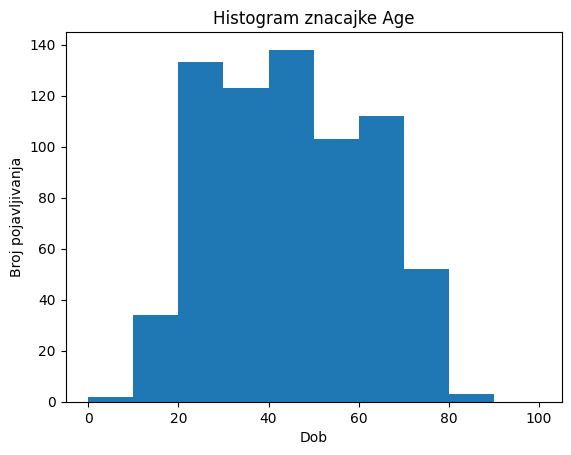

Broj nedostajucih vrijednosti znacajke Age: 0


In [6]:
print(f"Broj nedostajucih vrijednosti znacajke Age: {cleaned_df['Age'].isna().sum()}")

plt.hist(cleaned_df['Age'], range=(0, 100))
plt.xlabel('Dob')
plt.ylabel('Broj pojavljivanja')
plt.title('Histogram znacajke Age')
plt.show()

cleaned_df['Age'] = cleaned_df['Age'].fillna(cleaned_df['Age'].mean())

print(f"Broj nedostajucih vrijednosti znacajke Age: {cleaned_df['Age'].isna().sum()}")

**Odgovor:** Obzirom da se iz grafickog prikaza vidi "normalna" razdioba bez vecih strsecih vrijednosti (nije potrebno koristit robusnije mjere kao medijan), mozemo koristiti nadopunjavanje aritmetickom sredinom.

g) (2 boda) Provjerite prikladnim prikazom je li distribucija značajke “Age”
simetrična. Ako nije, objasnite o kojoj se vrsti asimetričnosti radi.

**Odgovor:** U prethodnoj smo celiji za potrebe odredivanja metode nadopune vrijednosti graficki prikazali razdiobu varijable Age. Iako je blago veca pristranost prema godinama manjima od 40, razdioba je i dalje simetricna.

h) (4 boda) Provedite postupak DBSCAN kako biste otkrili stršeće vrijednosti u ovom
skupu podataka ne uzimajući u obzir ciljnu značajku (“Survived”). Po potrebi
varirajte parametre algoritma te na temelju odgovora algoritma provjerite
naznačene pojedince. Navedite redne brojeve stršećih podataka.

In [29]:
import numpy as np

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=4)
dbscan.fit(cleaned_df.iloc[:, :-1])

labels = dbscan.labels_
outliers = np.where(labels == -1)[0]

print("Nadene strsece vrijednosti na rednim brojevima:", *outliers)

Nadene strsece vrijednosti na rednim brojevima: 11 30 98 315 325 328 483 512 513 530 620 638 659


i) (3 boda) Provjerite mogu li se stršeće vrijednosti otkriti koristeći samo metode vizualizacije podataka. Pritom primijenite prikladni graf za njihovo otkrivanje. Koji graf koji ste isprobali daje najbolji prikaz stršećih vrijednosti?

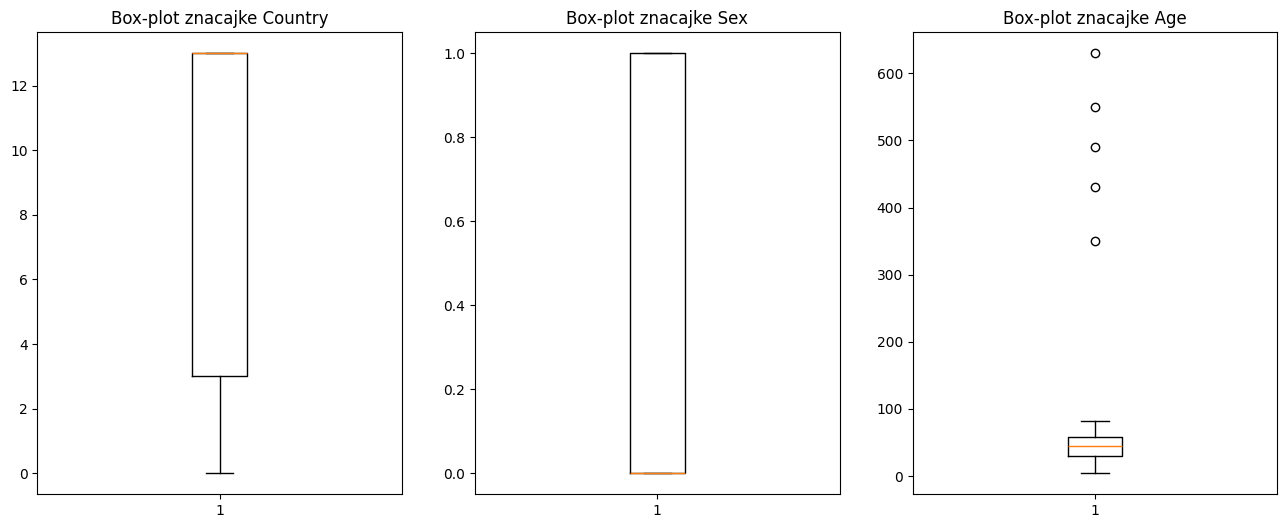

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

for i, col_name in enumerate(cleaned_df.columns[:-2]):  # We do not need category and survived
    axs[i].boxplot(cleaned_df[col_name])
    axs[i].set_title(f'Box-plot znacajke {col_name}')

plt.show()

**Odgovor:** Iako se iz stupicastog grafa moze vidjeti broj strsecih vrijednosti, najbolje se vidi koristenjem *box-plot* dijagrama. Pogledamo li znacajku Age vidimo znacajno odstupanje nakon treceg kvartila.

j) (4 boda) Korištenjem prikladnog algoritma nadziranog strojnog učenja s jasnim
tumačenjem ustanovite koja zemlja je bila najsretnija pri preživljavanju. Navedite
o kojoj zemlji se radi i gdje u modelu se ta činjenica vidi. Pritom model učite na
slučajno izdvojenih 67% podataka, a testirajte na preostalom skupu.

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression

X = cleaned_df[['Country', 'Sex', 'Age', 'Category']]
y = cleaned_df['Survived']

scaler = StandardScaler()
X.loc[:, 'Age'] = scaler.fit_transform(X[['Age']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Točnost modela: ", accuracy_score(y_test, y_pred))
print("Izvještaj o klasifikaciji:\n", classification_report(y_test, y_pred))

country_survival = cleaned_df.groupby("Country")["Survived"].mean().reset_index()
country_survival = country_survival.sort_values(by="Survived", ascending=False)

luckiest_country_encoded = country_survival.iloc[0]['Country']  # Encoded value
highest_survival_rate = country_survival.iloc[0]['Survived']
luckiest_country_original = le.inverse_transform([int(luckiest_country_encoded)])[0]

print(f"Zemlja s najvećom šansom preživljavanja: {luckiest_country_original} (Stopa preživljavanja: {highest_survival_rate:.2f})")

Točnost modela:  0.8163265306122449
Izvještaj o klasifikaciji:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       211
           1       0.31      0.26      0.29        34

    accuracy                           0.82       245
   macro avg       0.60      0.58      0.59       245
weighted avg       0.80      0.82      0.81       245

Zemlja s najvećom šansom preživljavanja: Great Britain (Stopa preživljavanja: 0.50)


**Odgovor:** Mozemo koristiti slucajne sume ili logisticku regresiju zbog probabilisticke interpretabilnosti.

## 2. Zadatak

Skup podataka „Possum“ sadrži podatke o 104 planinska četkasta oposuma pronađena
na sedam lokacija u Australiji: redni broj oposuma, oznaku lokacije gdje je pronađen
oposum, populaciju (Vic – Victoria, other – Novi Južni Wales ili Queensland), spol (M -
muški, F – ženski), dob, duljina glave u mm, širina lubanje u mm, ukupna duljina u cm,
duljina repa u cm, duljina stopala u mm, duljina ušne školjke u mm, udaljenost od
medijalnog kantusa do lateralnog kantusa desnog oka u mm, obujam prsa u cm i opseg
trbuha u cm. Za ovaj skup podataka (`possum.csv`) odredite:

a) (3 boda) Navedite metode prikupljanja podataka. Koja od navedenih metoda je
mogla biti upotrijebljena prilikom stvaranja ovog skupa podataka? Objasnite.

b) (3 boda) Kako možemo ukloniti statistički redundantne (nebitne) značajke?
Primjenom odgovarajuće metode utvrdite postoje li takve numeričke značajke u
ovom skupu i uklonite ih.

c) (4 boda) Za preostale numeričke značajke iz prethodnog dijela zadatka provedite
standardizaciju z-vrijednosti (z-skor) te potom primijenite grupiranje postupkom
k-srednjih vrijednosti (engl. k-means, uz variranje hiperparametra k između 1 i 5).
Pritom prikažite grupiranja primjeraka u dvije dimenzije za parove varijabli iz
skupa “eye“, “chest“ i “belly“. Uočavaju li se grupe? Na što treba obratiti
pozornost pri primjeni algoritma k-srednjih vrijednosti?

d) (2 boda) Izračunajte srednju vrijednost, standardnu devicijaciju i interkvartalno
raspršenje za sve numeričke značajke u ovom skupu. Vizualizirajte ih na istom
grafu koristeći kutijasti graf (engl. box plot).

e) (5 bodova) Modelirajte varijablu “totlngth” na temelju ostalih numeričkih
varijabli u skupu koristeći višestruku linearnu regresiju pri čemu je prethodno
potrebno standardizirati prediktorske varijable. Prikažite rezultate modela. Koje
su pretpostavke korištenja linearnog regresijskog modela?

f) (2 boda) Definirajte srednju kvadratnu pogrešku i primijenite ju na model iz
prethodnog pitanja koji se ispituje na izdvojenom testnom skupu – slučajnih 30%
primjeraka skupa.

## 3. Zadatak

EuroSAT (eurosat.zip) je skup satelitskih RGB slika dimenzija 64x64 koje su raspoređene
u deset klasa ovisno o tome što je na njima prikazano (urbana područja, šume, polja, …).
Vaš zadatak je složiti model dubokog učenja i naučiti ga na danom skupu podataka.
Prikažite implementirani kod.

a) (1 bod) Jedan od prvih koraka u pripremi slika za duboko učenje je njihova
anotacija. Objasnite što je anotirano u danom skupu slika.

b) (2 boda) Učitajte dani skup podataka i podijelite ga na skup za učenje i skup za
testiranje. Za samo učitavanje podataka možete iskoristiti već implementirani
razred `torch.utils.data.Dataset`.

In [ ]:
import os

class EuroSATDataset(Dataset):
  def __init__(self, data_dir):
    self.instances = []

    curr_label = -1
    for subdir, _, files in os.walk(data_dir):
      if curr_label < 0:
        curr_label += 1
        continue

      for file in files:
        if file.endswith('.jpg'):
          self.instances.append((os.path.join(subdir, file), curr_label))
      curr_label += 1

  def __len__(self):
    return len(self.instances)

  def __getitem__(self, idx):
    image = read_image(self.instances[idx][0]) / 255.0
    label = self.instances[idx][1]

    return image, label

In [ ]:
dataset = EuroSATDataset(data_dir / "eurosat/")

c) (3 boda) Složite model (bilo kakav) kojim ćete izvršiti klasifikaciju danih slika.

d) (3 boda) Prikažite matricu zabune. Izračunajte točnost, preciznost, odziv (recall) i
F1-mjeru (engl. F1-score). Objasnite dobivene rezultate i uspješnost modela
kojeg ste upotrijebili.

e) (5 bodova) Napišite funkciju za učenje modela i naučite implementirani model
(dovoljno je da model naučite na samo jednoj epohi => num_epochs=1). Ispišite
iznos funkcije gubitka i točnost vašeg modela na testnom skupu podataka.

# Dodatna teorijska pitanja

## 4. Zadatak

Marko je pri učenju primjetio da mu se model dosta lagano prenauči i stoga je
odlučio uvesti određene metode regularizacije. Točnije, odlučio je koristiti dropout i to
na takav način da bi poredao više dropout slojeva jedan za drugim:

In [ ]:
def Model(nn.Module):
    def __init__(self, . . .):
        # ... other code ...
        self.dropout1 = nn.Dropout(p=0.1)
        self.dropout2 = nn.Dropout(p=0.15)
        self.dropout3 = nn.Dropout(p=0.2)
        # ... other code
    def forward(self, x):
        # ... other code ...
        x = self.dropout1(x)
        x = self.dropout2(x)
        x = self.dropout3(x)
        # ... other code ...

Ima li ovakvo redanje dropout slojeva smisla? Je li moguće postići isti regularizacijski
učinak s manje linija koda? Obrazložite svoj odgovor i modificirajte Markov kod!

## 5. Zadatak

Osim primjene metode očuvanja mjere sredine, koje ste još postupke mogli primijeniti za zamjenu nedostajuće vrijednosti nekom drugom u 1. zadatku?

**Odgovor:**

## 6. Zadatak

Objasnite princip učenja značajki (engl. feature learning, representation learning) u kontekstu ekspertnih značajki i ulaznih podataka.

**Odgovor:**

## 7. Zadatak

Objasnite koja je razlika između reziduala i pogreške kod regresije. 

**Odgovor:**

## 8. Zadatak

 Što testiramo hi-kvadrat testom, kakve frekvencije koristimo u izračunu hikvadrat vrijednosti?

**Odgovor:**

## 9. Zadatak

Za algoritam k-NN, navedite kako izabrati k u praksi.

**Odgovor:**

## 10. Zadatak

Navedite koja svojstva funkcija mora zadovoljavati da bude mjera udaljenosti.

**Odgovor:**

## 11. Zadatak

Navedite barem dva slučaja kada biste primijenili umjetno povećavanje broja
primjera u skupu podataka.

**Odgovor:**